In [10]:
# load dataset
import pandas as pd
data = pd.read_csv('Mall_Customers.csv')
data.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
8,9,Male,64,19,3
58,59,Female,27,46,51
45,46,Female,24,39,65
187,188,Male,28,101,68
59,60,Male,53,46,46


In [11]:

data = data[['Annual Income (k$)','Spending Score (1-100)']]

# rename names of columns for simplicity
data = data.rename(columns={'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'score'})

data.sample(5)

,income,score
195,120,79
193,113,91
12,20,15
79,54,42
166,86,20


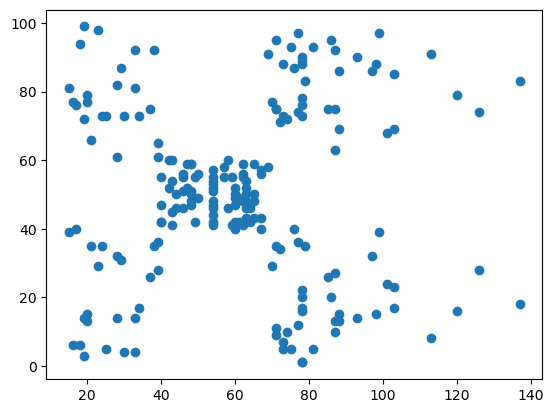

In [12]:

# visualize the data distribution
import matplotlib.pyplot as plt
plt.scatter(data['income'],data['score'])

In [13]:
# calculate sum of squares errors for different K values
from sklearn.cluster import KMeans
k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error = []
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(data[['income','score']])
    wcss_error.append(model.inertia_)

C:\Users\sheni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sheni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sheni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sheni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

In [14]:

# sum of squares error for K=1 to k=10
wcss_error

[269981.28,
 186186.60937282717,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 38788.45862332112,
 35502.24562670918,
 26676.780769600773,
 26629.993500201348,
 20596.323288788506]

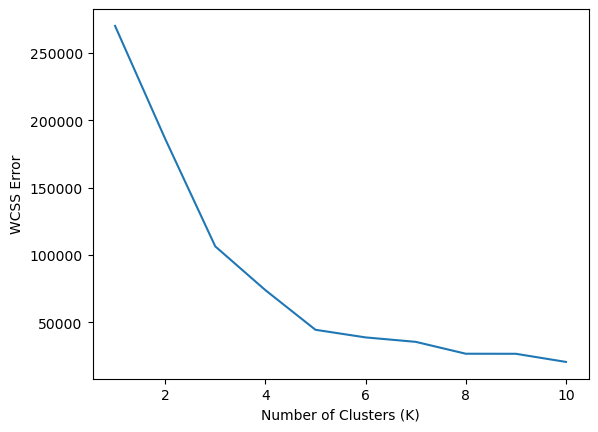

In [15]:
# plot WCSS error corresponding to different K values
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS Error')
plt.plot(k_values, wcss_error)

In [16]:

# train model using k=5
model = KMeans(n_clusters=5)
pred = model.fit_predict(data[['income','score']])

C:\Users\sheni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:

# see predicted clusters
pred

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [18]:

# add cluster column to dataset
data['cluster'] = pred

In [19]:

data.sample(5)

,income,score,cluster
178,93,14,4
113,64,46,0
142,76,40,0
124,70,29,4
109,63,48,0


In [20]:

# centers of clusters
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

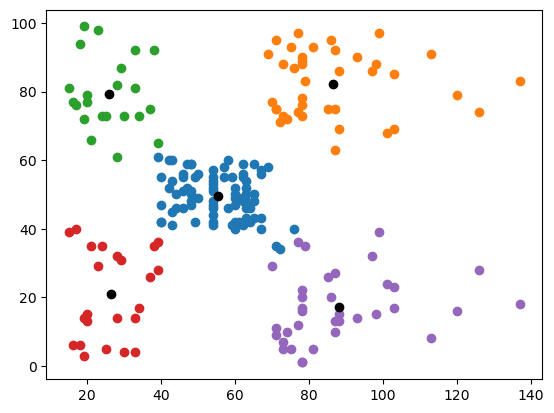

In [21]:

# visualize clusted data

cluster1 = data[data['cluster']==0]
plt.scatter(cluster1['income'], cluster1['score'])

cluster2 = data[data['cluster']==1]
plt.scatter(cluster2['income'], cluster2['score'])

cluster3 = data[data['cluster']==2]
plt.scatter(cluster3['income'], cluster3['score'])

cluster2 = data[data['cluster']==3]
plt.scatter(cluster2['income'], cluster2['score'])

cluster3 = data[data['cluster']==4]
plt.scatter(cluster3['income'], cluster3['score'])

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black')